# import Libraries

In [2]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import PIL
from PIL import Image
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import cv2
from matplotlib.image import imread
import tensorflow as tf
from keras.utils import to_categorical
import keras.utils as image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import  GlobalAveragePooling2D, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# read files

#### dicom data

In [5]:
dicom_data= pd.read_csv('E:/me/my Projects/dataset/csv/dicom_info.csv')
image_dir= 'E:/me/my Projects/dataset/jpeg'
dicom_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

#### calc case

In [7]:
calc_case_train = pd.read_csv("E:/me/my Projects/dataset/csv/calc_case_description_train_set.csv")
calc_case_train.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [8]:
calc_case_test = pd.read_csv("E:/me/my Projects/dataset/csv/calc_case_description_test_set.csv")
calc_case_test.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT        MLO               1   
2    P_00038               2                RIGHT         CC               1   
3    P_00038               2                RIGHT         CC               2   
4    P_00038               2                RIGHT        MLO               1   

  abnormality type             calc type calc distribution  assessment  \
0    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2    calcification              VASCULAR               NaN           2   
3    calcification              VASCULAR               NaN           2   
4    calcification              VASCULAR               NaN           2   

                 pathology  subtlety  \
0                   BENIGN         2   
1                   BENIGN         2   
2  BENIGN_WITHOUT_CALLBACK         5   
3  BENIGN_WITHOUT_CALLBACK         5   
4  BENIGN_WITHOUT_CALLBACK         5   

                                     image file path  \
0  Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
3  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
4  Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...   

                             cropped image file path  \
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....   
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....   
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...   

                                  ROI mask file path  
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....  
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....  
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...

#### mass case

In [10]:
mass_case_train = pd.read_csv("E:/me/my Projects/dataset/csv/mass_case_description_train_set.csv")
mass_case_train.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [11]:
mass_case_test = pd.read_csv("E:/me/my Projects/dataset/csv/mass_case_description_test_set.csv")
mass_case_test.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality type mass shape   mass margins  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image file path  \
0  Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...   
3  Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...   
4  Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...   

                             cropped image file path  \
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....   
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....   

                                  ROI mask file path  
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....  
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....

# data Preprocessing

#### dicom data

In [14]:
dicom_data.describe()


AccessionNumber  BitsAllocated    BitsStored       Columns  \
count              0.0   10237.000000  10237.000000  10237.000000   
mean               NaN      13.212465     13.212465   2179.893328   
std                NaN       3.812001      3.812001   1374.221082   
min                NaN       8.000000      8.000000     68.000000   
25%                NaN       8.000000      8.000000    453.000000   
50%                NaN      16.000000     16.000000   2728.000000   
75%                NaN      16.000000     16.000000   3112.000000   
max                NaN      16.000000     16.000000   5431.000000   

        ContentDate    ContentTime       HighBit  InstanceNumber  \
count  1.023700e+04   10237.000000  10237.000000         10237.0   
mean   2.016047e+07  123061.253633     12.212465             1.0   
std    1.110497e+02   11391.443116      3.812001             0.0   
min    2.016041e+07   82755.508003      7.000000             1.0   
25%    2.016043e+07  113739.594000      7.000000             1.0   
50%    2.016050e+07  122935.931000     15.000000             1.0   
75%    2.016050e+07  132211.431000     15.000000             1.0   
max    2.017092e+07  160507.857000     15.000000             1.0   

       LargestImagePixelValue  PatientBirthDate  PatientSex  \
count            10237.000000               0.0         0.0   
mean             42612.290222               NaN         NaN   
std              30995.808636               NaN         NaN   
min                255.000000               NaN         NaN   
25%                255.000000               NaN         NaN   
50%              65535.000000               NaN         NaN   
75%              65535.000000               NaN         NaN   
max              65535.000000               NaN         NaN   

       PixelRepresentation  ReferringPhysicianName          Rows  \
count              10237.0                     0.0  10237.000000   
mean                   0.0                     NaN   3549.778841   
std                    0.0                     NaN   2363.196643   
min                    0.0                     NaN     73.000000   
25%                    0.0                     NaN    441.000000   
50%                    0.0                     NaN   4624.000000   
75%                    0.0                     NaN   5476.000000   
max                    0.0                     NaN   7111.000000   

       SamplesPerPixel  SeriesNumber  SmallestImagePixelValue     StudyDate  \
count          10237.0       10237.0             10237.000000  9.671000e+03   
mean               1.0           1.0              9294.026473  2.016440e+07   
std                0.0           0.0             15367.554560  4.831298e+03   
min                1.0           1.0                 0.000000  2.016072e+07   
25%                1.0           1.0                 0.000000  2.016072e+07   
50%                1.0           1.0                 0.000000  2.016081e+07   
75%                1.0           1.0             19687.000000  2.017083e+07   
max                1.0           1.0             59538.000000  2.017093e+07   

           StudyTime  
count    9671.000000  
mean   157864.407817  
std     51545.806583  
min     82235.000000  
25%     90742.500000  
50%    170335.000000  
75%    214819.000000  
max    224502.000000

In [15]:
dicom_data.info()
dicom_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

(10237, 38)

In [16]:
dicom_data.isna().sum()

file_path                                          0
image_path                                         0
AccessionNumber                                10237
BitsAllocated                                      0
BitsStored                                         0
BodyPartExamined                                   0
Columns                                            0
ContentDate                                        0
ContentTime                                        0
ConversionType                                     0
HighBit                                            0
InstanceNumber                                     0
LargestImagePixelValue                             0
Laterality                                       566
Modality                                           0
PatientBirthDate                               10237
PatientID                                          0
PatientName                                        0
PatientOrientation                            

In [17]:
dicom_data.drop(['PatientBirthDate','AccessionNumber','PatientSex','ReferringPhysicianName'],axis =1, inplace=True)

In [18]:
dicom_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_data['StudyDate'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_data['StudyTime'].fillna(method = 'bfill', axis = 0, inplace=True)

C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\4102628190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dicom_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\4102628190.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\4102628190.py:

In [19]:
dicom_data.isna().sum()

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
Columns                                        0
ContentDate                                    0
ContentTime                                    0
ConversionType                                 0
HighBit                                        0
InstanceNumber                                 0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
Rows                                           0
SOPClassUID         

In [20]:
dicom_data.SeriesDescription.unique()


array(['cropped images', 'full mammogram images', 'ROI mask images'],
      dtype=object)

In [21]:
dicom_data.SeriesDescription.value_counts()

SeriesDescription
cropped images           3859
ROI mask images          3340
full mammogram images    3038
Name: count, dtype: int64

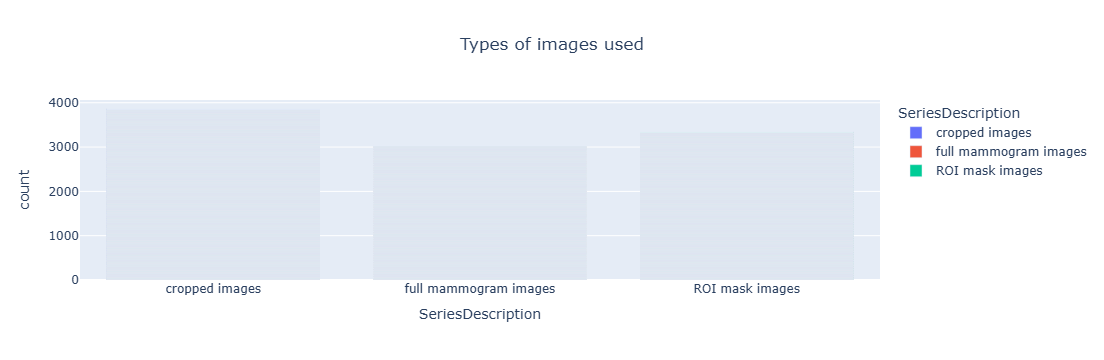

In [22]:
ba_1 = px.bar(data_frame=dicom_data, x='SeriesDescription', color='SeriesDescription',
              title='Types of images used')
ba_1.update_layout(title_text='Types of images used', title_x=0.5)
ba_1.show()

In [23]:
cropped_images = dicom_data[dicom_data.SeriesDescription=="cropped images"].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [24]:
full_mammogram = dicom_data[dicom_data.SeriesDescription=="full mammogram images"].image_path
full_mammogram.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [25]:
roi_mask = dicom_data[dicom_data.SeriesDescription=="ROI mask images"].image_path
roi_mask.head()

4     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
Name: image_path, dtype: object

In [26]:
def replace_path(sample, old_path, new_path):
    return sample.replace(old_path, new_path, regex=True)

In [27]:
def plot_smaples(sample, row=15, col=15):
    plt.figure(figsize=(row, col))
    for i, file in enumerate(sample[0:4]):
        cropped_images_show = PIL.Image.open(file)
        gray_img= cropped_images_show.convert("L")
        plt.subplot(1,5,i+1)
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
    plt.show()

In [28]:
cropped_images = replace_path(cropped_images, "CBIS-DDSM/jpeg", image_dir)
print('Cropped Images paths:')
print(cropped_images.iloc[0:5])

Cropped Images paths:
0     E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
3     E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
6     E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
7     E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
10    E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
Name: image_path, dtype: object


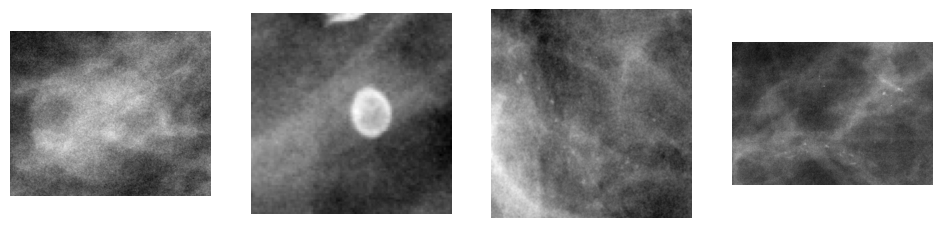

In [29]:
plot_smaples(cropped_images)


In [30]:
full_mammogram = replace_path(full_mammogram, "CBIS-DDSM/jpeg", image_dir)
print('Full mammo Images paths:')
print(full_mammogram.head())

Full mammo Images paths:
1     E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
2     E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
11    E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
12    E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
15    E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
Name: image_path, dtype: object


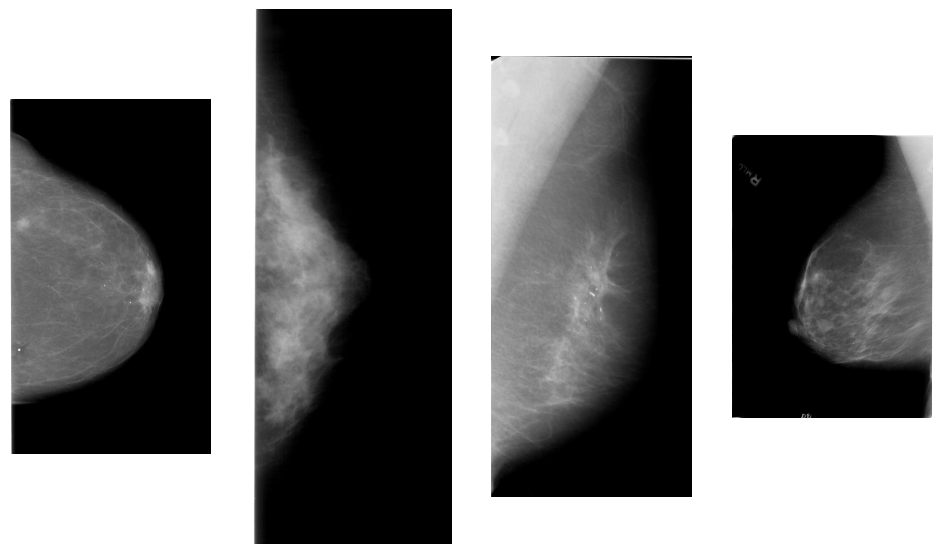

In [31]:
plot_smaples(full_mammogram)


In [32]:
roi_mask = replace_path(roi_mask, "CBIS-DDSM/jpeg", image_dir)
print(' ROI Mask Images paths:')
print(roi_mask.head())

 ROI Mask Images paths:
4     E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
5     E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
8     E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
9     E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
14    E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...
Name: image_path, dtype: object


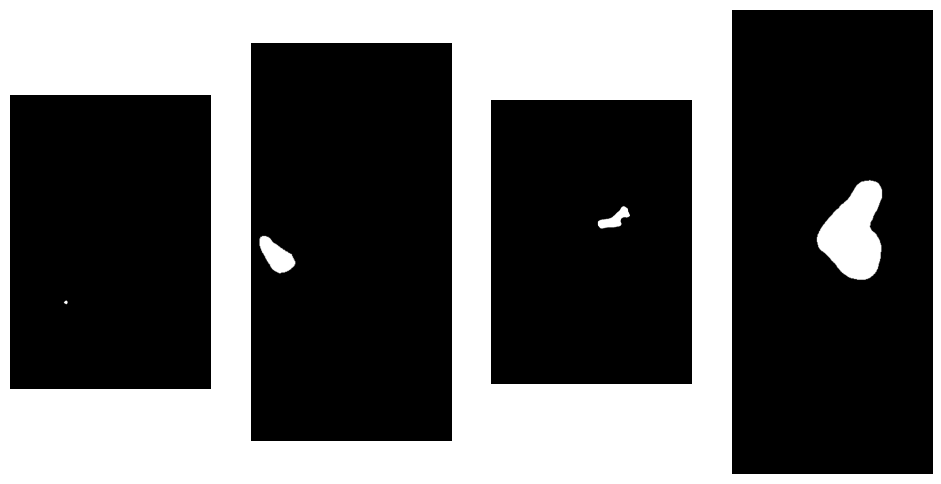

In [33]:
plot_smaples(roi_mask)


#### calc case

In [35]:
calc_case_train.describe()

breast density  abnormality id   assessment     subtlety
count     1546.000000     1546.000000  1546.000000  1546.000000
mean         2.663648        1.415265     3.258732     3.411384
std          0.937219        0.903571     1.229231     1.179754
min          1.000000        1.000000     0.000000     1.000000
25%          2.000000        1.000000     2.000000     3.000000
50%          3.000000        1.000000     4.000000     3.000000
75%          3.000000        1.000000     4.000000     4.000000
max          4.000000        7.000000     5.000000     5.000000

In [36]:
calc_case_test.describe()

breast density  abnormality id  assessment    subtlety
count      326.000000      326.000000  326.000000  326.000000
mean         2.696319        1.214724    3.453988    3.319018
std          0.909667        0.529061    1.188159    1.188175
min          0.000000        1.000000    0.000000    1.000000
25%          2.000000        1.000000    2.000000    3.000000
50%          3.000000        1.000000    4.000000    3.000000
75%          3.000000        1.000000    4.000000    4.000000
max          4.000000        5.000000    5.000000    5.000000

In [37]:
calc_case_train.info()
calc_case_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

(1546, 14)

In [38]:
calc_case_test.info()
calc_case_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   abnormality type         326 non-null    object
 6   calc type                322 non-null    object
 7   calc distribution        263 non-null    object
 8   assessment               326 non-null    int64 
 9   pathology                326 non-null    object
 10  subtlety                 326 non-null    int64 
 11  image file path          326 non-null    object
 12  cropped image file path  326 non-null    object
 13  ROI mask file path       326 non-null    object
dtypes: int64(4), object(10)
memory usage: 35.8

(326, 14)

In [39]:
calc_case_train['pathology'] = calc_case_train['pathology'].astype('category')
calc_case_train['calc type'] =calc_case_train['calc type'].astype('category')
calc_case_train['calc distribution'] = calc_case_train['calc distribution'].astype('category')
calc_case_train['abnormality type'] = calc_case_train['abnormality type'].astype('category')
calc_case_train['image view'] =calc_case_train['image view'].astype('category')
calc_case_train['left or right breast'] =calc_case_train['left or right breast'].astype('category')

In [40]:
calc_case_test['pathology'] = calc_case_test['pathology'].astype('category')
calc_case_test['calc type'] =calc_case_test['calc type'].astype('category')
calc_case_test['calc distribution'] = calc_case_test['calc distribution'].astype('category')
calc_case_test['abnormality type'] = calc_case_test['abnormality type'].astype('category')
calc_case_test['image view'] =calc_case_test['image view'].astype('category')
calc_case_test['left or right breast'] =calc_case_test['left or right breast'].astype('category')

In [41]:
calc_case_train.isna().sum()

patient_id                   0
breast density               0
left or right breast         0
image view                   0
abnormality id               0
abnormality type             0
calc type                   20
calc distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [42]:
calc_case_train['calc type'].fillna(method = 'bfill', axis = 0, inplace=True) 
calc_case_train['calc distribution'].fillna(method = 'bfill', axis = 0, inplace=True)

C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\478615308.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\478615308.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\478615308.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pan

In [43]:
calc_case_train.isna().sum()

patient_id                 0
breast density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
calc type                  0
calc distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [44]:
calc_case_test.isna().sum()

patient_id                  0
breast density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
calc type                   4
calc distribution          63
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [45]:
calc_case_test['calc type'].fillna(method = 'bfill', axis = 0, inplace=True) 
calc_case_test['calc distribution'].fillna(method = 'bfill', axis = 0, inplace=True)

C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\3288335507.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\3288335507.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\3288335507.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in 

In [46]:
calc_case_test.isna().sum()

patient_id                 0
breast density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
calc type                  0
calc distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [47]:
print(calc_case_train['pathology'].value_counts())
print(calc_case_test['pathology'].value_counts())

pathology
MALIGNANT                  544
BENIGN                     528
BENIGN_WITHOUT_CALLBACK    474
Name: count, dtype: int64
pathology
BENIGN                     130
MALIGNANT                  129
BENIGN_WITHOUT_CALLBACK     67
Name: count, dtype: int64


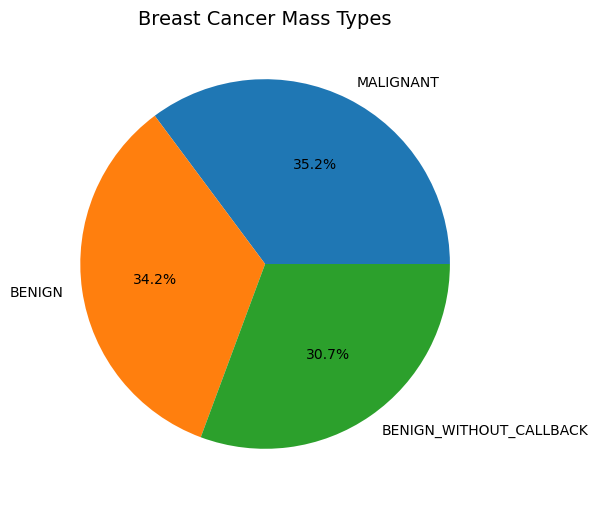

In [48]:

value = calc_case_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
plt.savefig(image_dir)
plt.show()

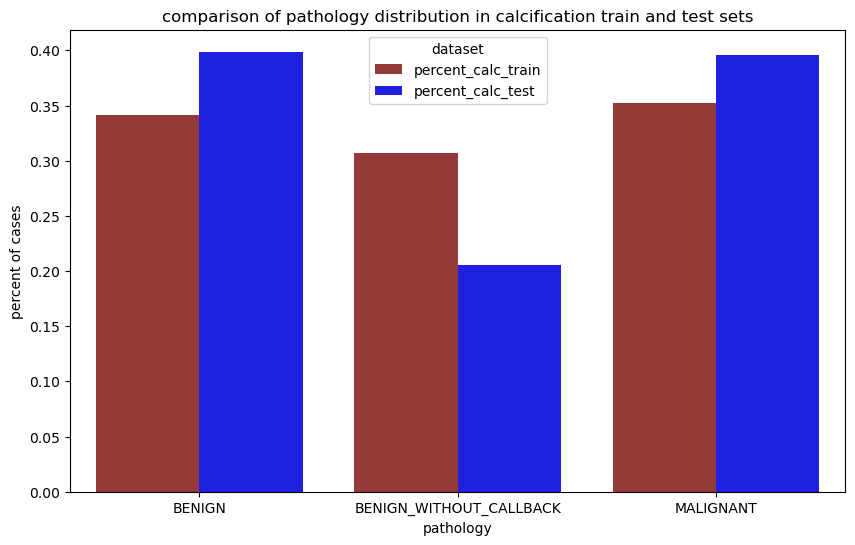

In [49]:
train_dist = calc_case_train['pathology'].value_counts(normalize=True).reset_index()
train_dist.columns = ['pathology', 'percent_calc_train']

test_dist = calc_case_test['pathology'].value_counts(normalize=True).reset_index()
test_dist.columns = ['pathology', 'percent_calc_test']

comparison_df = pd.merge(train_dist, test_dist, on='pathology', how='outer')

comparison_melted = pd.melt(comparison_df, id_vars='pathology', value_vars=['percent_calc_train', 'percent_calc_test'],
                            var_name='dataset', value_name='percent')

plt.figure(figsize=(10, 6))
sns.barplot(x='pathology', y='percent', hue='dataset', data=comparison_melted, palette=['brown', 'blue'])

plt.title('comparison of pathology distribution in calcification train and test sets')
plt.xlabel('pathology')
plt.ylabel('percent of cases')

plt.show()

#### mass_case

In [51]:
mass_case_train.describe()

breast_density  abnormality id   assessment     subtlety
count     1318.000000     1318.000000  1318.000000  1318.000000
mean         2.203338        1.116085     3.504552     3.965857
std          0.873774        0.467013     1.414609     1.102032
min          1.000000        1.000000     0.000000     0.000000
25%          2.000000        1.000000     3.000000     3.000000
50%          2.000000        1.000000     4.000000     4.000000
75%          3.000000        1.000000     4.000000     5.000000
max          4.000000        6.000000     5.000000     5.000000

In [52]:
mass_case_test.describe()

breast_density  abnormality id  assessment    subtlety
count      378.000000      378.000000  378.000000  378.000000
mean         2.396825        1.092593    3.534392    3.785714
std          0.859455        0.398136    1.343076    1.171776
min          1.000000        1.000000    0.000000    1.000000
25%          2.000000        1.000000    3.000000    3.000000
50%          2.000000        1.000000    4.000000    4.000000
75%          3.000000        1.000000    4.000000    5.000000
max          4.000000        4.000000    5.000000    5.000000

In [53]:
mass_case_train.info()
mass_case_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

(1318, 14)

In [54]:
mass_case_test.info()
mass_case_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               378 non-null    object
 1   breast_density           378 non-null    int64 
 2   left or right breast     378 non-null    object
 3   image view               378 non-null    object
 4   abnormality id           378 non-null    int64 
 5   abnormality type         378 non-null    object
 6   mass shape               378 non-null    object
 7   mass margins             361 non-null    object
 8   assessment               378 non-null    int64 
 9   pathology                378 non-null    object
 10  subtlety                 378 non-null    int64 
 11  image file path          378 non-null    object
 12  cropped image file path  378 non-null    object
 13  ROI mask file path       378 non-null    object
dtypes: int64(4), object(10)
memory usage: 41.5

(378, 14)

In [55]:
mass_case_train['left or right breast'] = mass_case_train['left or right breast'].astype('category')
mass_case_train['image view'] = mass_case_train['image view'].astype('category')
mass_case_train['mass margins'] = mass_case_train['mass margins'].astype('category')
mass_case_train['mass shape'] = mass_case_train['mass shape'].astype('category')
mass_case_train['abnormality type'] = mass_case_train['abnormality type'].astype('category')

In [56]:
mass_case_test['left or right breast'] = mass_case_test['left or right breast'].astype('category')
mass_case_test['image view'] = mass_case_test['image view'].astype('category')
mass_case_test['mass margins'] = mass_case_test['mass margins'].astype('category')
mass_case_test['mass shape'] = mass_case_test['mass shape'].astype('category')
mass_case_test['abnormality type'] = mass_case_test['abnormality type'].astype('category')

In [57]:
mass_case_train.isna().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  4
mass margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [58]:
mass_case_train['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
mass_case_train['mass margins'].fillna(method = 'bfill', axis = 0, inplace=True)

C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\2294849560.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\2294849560.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\2294849560.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in 

In [59]:
mass_case_train.isna().sum()

patient_id                 0
breast_density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
mass shape                 0
mass margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [60]:
mass_case_test.isna().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [61]:
mass_case_test['mass margins'].fillna(method = 'bfill', axis = 0, inplace=True) 


C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\1155073144.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\1155073144.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [62]:
mass_case_test.isna().sum()

patient_id                 0
breast_density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
mass shape                 0
mass margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [63]:
print(mass_case_train['pathology'].value_counts())
print(mass_case_test['pathology'].value_counts())

pathology
MALIGNANT                  637
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
Name: count, dtype: int64
pathology
BENIGN                     194
MALIGNANT                  147
BENIGN_WITHOUT_CALLBACK     37
Name: count, dtype: int64


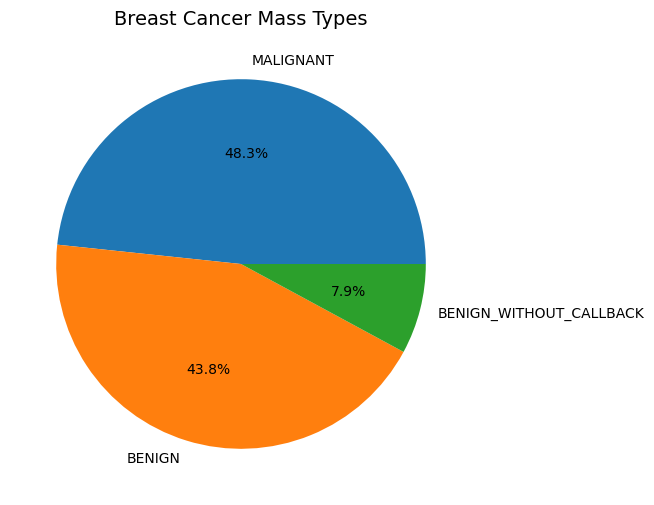

In [64]:

value = mass_case_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
plt.savefig(image_dir)
plt.show()

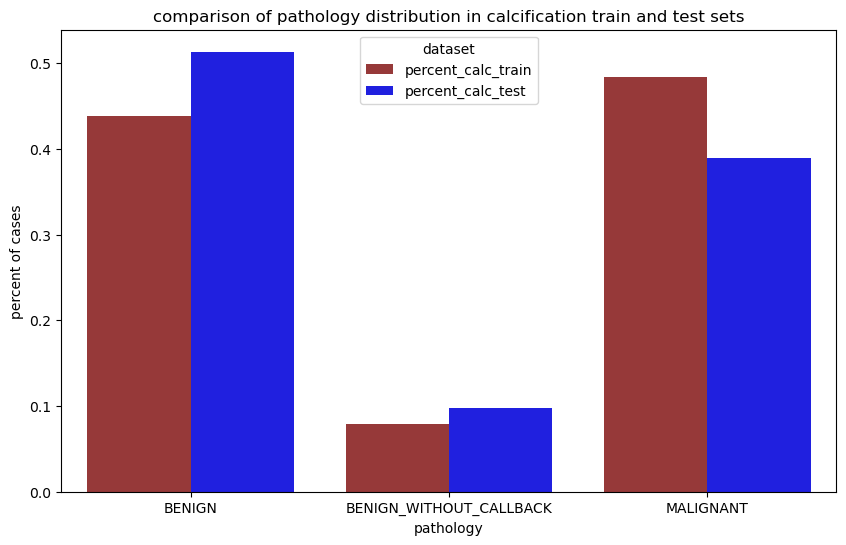

In [65]:
train_dist = mass_case_train['pathology'].value_counts(normalize=True).reset_index()
train_dist.columns = ['pathology', 'percent_calc_train']

test_dist = mass_case_test['pathology'].value_counts(normalize=True).reset_index()
test_dist.columns = ['pathology', 'percent_calc_test']

comparison_df = pd.merge(train_dist, test_dist, on='pathology', how='outer')

comparison_melted = pd.melt(comparison_df, id_vars='pathology', value_vars=['percent_calc_train', 'percent_calc_test'],
                            var_name='dataset', value_name='percent')

plt.figure(figsize=(10, 6))
sns.barplot(x='pathology', y='percent', hue='dataset', data=comparison_melted, palette=['brown', 'blue'])

plt.title('comparison of pathology distribution in calcification train and test sets')
plt.xlabel('pathology')
plt.ylabel('percent of cases')

plt.show()

In [66]:
full_dataset = pd.concat([calc_case_train, calc_case_test,mass_case_train,mass_case_test], axis=0)


In [67]:
full_dataset.head()


patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005             3.0                RIGHT         CC               1   
1    P_00005             3.0                RIGHT        MLO               1   
2    P_00007             4.0                 LEFT         CC               1   
3    P_00007             4.0                 LEFT        MLO               1   
4    P_00008             1.0                 LEFT         CC               1   

  abnormality type                                   calc type  \
0    calcification                                   AMORPHOUS   
1    calcification                                   AMORPHOUS   
2    calcification                                 PLEOMORPHIC   
3    calcification                                 PLEOMORPHIC   
4    calcification  ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC   

  calc distribution  assessment                pathology  subtlety  \
0         CLUSTERED           3                MALIGNANT         3   
1         CLUSTERED           3                MALIGNANT         3   
2            LINEAR           4                   BENIGN         4   
3            LINEAR           4                   BENIGN         4   
4          REGIONAL           2  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  breast_density  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...             NaN   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....             NaN   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...             NaN   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...             NaN   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...             NaN   

  mass shape mass margins  
0        NaN          NaN  
1        NaN          NaN  
2        NaN          NaN  
3        NaN          NaN  
4        NaN          NaN

In [68]:
full_dataset.tail()

patient_id  breast density left or right breast image view  \
373    P_01825             NaN                RIGHT        MLO   
374    P_01833             NaN                RIGHT        MLO   
375    P_01865             NaN                 LEFT        MLO   
376    P_01912             NaN                RIGHT         CC   
377    P_01912             NaN                RIGHT        MLO   

     abnormality id abnormality type calc type calc distribution  assessment  \
373               1             mass       NaN               NaN           3   
374               1             mass       NaN               NaN           5   
375               1             mass       NaN               NaN           4   
376               1             mass       NaN               NaN           5   
377               1             mass       NaN               NaN           5   

                   pathology  subtlety  \
373  BENIGN_WITHOUT_CALLBACK         3   
374                MALIGNANT         5   
375                MALIGNANT         2   
376                MALIGNANT         4   
377                MALIGNANT         4   

                                       image file path  \
373  Mass-Test_P_01825_RIGHT_MLO/1.3.6.1.4.1.9590.1...   
374  Mass-Test_P_01833_RIGHT_MLO/1.3.6.1.4.1.9590.1...   
375  Mass-Test_P_01865_LEFT_MLO/1.3.6.1.4.1.9590.10...   
376  Mass-Test_P_01912_RIGHT_CC/1.3.6.1.4.1.9590.10...   
377  Mass-Test_P_01912_RIGHT_MLO/1.3.6.1.4.1.9590.1...   

                               cropped image file path  \
373  Mass-Test_P_01825_RIGHT_MLO_1/1.3.6.1.4.1.9590...   
374  Mass-Test_P_01833_RIGHT_MLO_1/1.3.6.1.4.1.9590...   
375  Mass-Test_P_01865_LEFT_MLO_1/1.3.6.1.4.1.9590....   
376  Mass-Test_P_01912_RIGHT_CC_1/1.3.6.1.4.1.9590....   
377  Mass-Test_P_01912_RIGHT_MLO_1/1.3.6.1.4.1.9590...   

                                    ROI mask file path  breast_density  \
373  Mass-Test_P_01825_RIGHT_MLO_1/1.3.6.1.4.1.9590...             2.0   
374  Mass-Test_P_01833_RIGHT_MLO_1/1.3.6.1.4.1.9590...             2.0   
375  Mass-Test_P_01865_LEFT_MLO_1/1.3.6.1.4.1.9590....             2.0   
376  Mass-Test_P_01912_RIGHT_CC_1/1.3.6.1.4.1.9590....             3.0   
377  Mass-Test_P_01912_RIGHT_MLO_1/1.3.6.1.4.1.9590...             3.0   

    mass shape    mass margins  
373  LOBULATED  MICROLOBULATED  
374  IRREGULAR     ILL_DEFINED  
375  IRREGULAR     ILL_DEFINED  
376  IRREGULAR      SPICULATED  
377  IRREGULAR      SPICULATED

In [69]:
full_dataset.shape

(3568, 17)

In [70]:
def get_image_file_name(data, new_dict):
    for dicom in data:
        key = dicom.split('/')[5]
        new_dict[key] = dicom
    print(f"the length of dataset ==> {len(new_dict.keys())}")

In [71]:
cropped_images_dict = dict()
full_mammo_dict = dict()
roi_img_dict = dict()

get_image_file_name(cropped_images, cropped_images_dict)
get_image_file_name(full_mammogram, full_mammo_dict)
get_image_file_name(roi_mask, roi_img_dict)

the length of dataset ==> 3641
the length of dataset ==> 3038
the length of dataset ==> 3340


In [72]:
def fix_image_path(data):
    for indx, image in enumerate(data.values):
        img_name = image[11].split('/')[2]
        if img_name in full_mammo_dict:
            data.iloc[indx, 11] = full_mammo_dict[img_name]
        else:
            data.iloc[indx, 11] = None
        img_name = image[12].split('/')[2]
        if img_name in cropped_images_dict:
            data.iloc[indx, 12] = cropped_images_dict[img_name]
        else:
            data.iloc[indx, 11] = None
        img_name = image[13].split('/')[2]
        if img_name in roi_img_dict:
            data.iloc[indx, 13] = roi_img_dict[img_name]

        else:
            data.iloc[indx, 13] = None

In [73]:
fix_image_path(full_dataset)


In [74]:
full_dataset.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005             3.0                RIGHT         CC               1   
1    P_00005             3.0                RIGHT        MLO               1   
2    P_00007             4.0                 LEFT         CC               1   
3    P_00007             4.0                 LEFT        MLO               1   
4    P_00008             1.0                 LEFT         CC               1   

  abnormality type                                   calc type  \
0    calcification                                   AMORPHOUS   
1    calcification                                   AMORPHOUS   
2    calcification                                 PLEOMORPHIC   
3    calcification                                 PLEOMORPHIC   
4    calcification  ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC   

  calc distribution  assessment                pathology  subtlety  \
0         CLUSTERED           3                MALIGNANT         3   
1         CLUSTERED           3                MALIGNANT         3   
2            LINEAR           4                   BENIGN         4   
3            LINEAR           4                   BENIGN         4   
4          REGIONAL           2  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
1  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
2  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
3  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
4  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   

                             cropped image file path  \
0  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
1  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
2  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
3  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
4  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   

                                  ROI mask file path  breast_density  \
0  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             NaN   
1  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             NaN   
2  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             NaN   
3  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             NaN   
4  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             NaN   

  mass shape mass margins  
0        NaN          NaN  
1        NaN          NaN  
2        NaN          NaN  
3        NaN          NaN  
4        NaN          NaN

In [75]:
full_dataset.isna().sum()

patient_id                    0
breast density             1696
left or right breast          0
image view                    0
abnormality id                0
abnormality type              0
calc type                  1696
calc distribution          1696
assessment                    0
pathology                     0
subtlety                      0
image file path             148
cropped image file path       0
ROI mask file path          281
breast_density             1872
mass shape                 1872
mass margins               1872
dtype: int64

In [76]:
full_dataset['image file path'].fillna(method = 'bfill', axis = 0, inplace=True) 
full_dataset['breast density'].fillna(method = 'ffill', axis = 0, inplace=True) 
full_dataset['calc type'].fillna(method = 'ffill', axis = 0, inplace=True) 
full_dataset['calc distribution'].fillna(method = 'ffill', axis = 0, inplace=True) 
full_dataset['ROI mask file path'].fillna(method = 'ffill', axis = 0, inplace=True) 
full_dataset['breast_density'].fillna(method = 'bfill', axis = 0, inplace=True) 
full_dataset['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
full_dataset['mass margins'].fillna(method = 'bfill', axis = 0, inplace=True) 

C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\3034570373.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\3034570373.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\ABA\AppData\Local\Temp\ipykernel_3756\3034570373.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in 

In [77]:
full_dataset.isna().sum()

patient_id                 0
breast density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
calc type                  0
calc distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
breast_density             0
mass shape                 0
mass margins               0
dtype: int64

In [78]:
full_dataset['pathology']=full_dataset['pathology'].replace('BENIGN_WITHOUT_CALLBACK', 'BENIGN')

In [79]:
full_dataset.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005             3.0                RIGHT         CC               1   
1    P_00005             3.0                RIGHT        MLO               1   
2    P_00007             4.0                 LEFT         CC               1   
3    P_00007             4.0                 LEFT        MLO               1   
4    P_00008             1.0                 LEFT         CC               1   

  abnormality type                                   calc type  \
0    calcification                                   AMORPHOUS   
1    calcification                                   AMORPHOUS   
2    calcification                                 PLEOMORPHIC   
3    calcification                                 PLEOMORPHIC   
4    calcification  ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC   

  calc distribution  assessment  pathology  subtlety  \
0         CLUSTERED           3  MALIGNANT         3   
1         CLUSTERED           3  MALIGNANT         3   
2            LINEAR           4     BENIGN         4   
3            LINEAR           4     BENIGN         4   
4          REGIONAL           2     BENIGN         3   

                                     image file path  \
0  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
1  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
2  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
3  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
4  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   

                             cropped image file path  \
0  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
1  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
2  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
3  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
4  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   

                                  ROI mask file path  breast_density  \
0  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             3.0   
1  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             3.0   
2  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             3.0   
3  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             3.0   
4  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             3.0   

                           mass shape mass margins  
0  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED  
1  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED  
2  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED  
3  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED  
4  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED

In [81]:
def image_processor(image_path, target_size):
    try:
        absolute_image_path = os.path.abspath(image_path)
        image = cv2.imread(absolute_image_path)
        if image is None:
            print(f"Warning: Image not found: {absolute_image_path}")
            return None
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (target_size[1], target_size[0]))
        image = image / 255.0
        return image
    except Exception as e:
        print(f"Error processing image at {image_path}: {e}")
        return None

In [82]:
target_size = (224, 224, 3)

full_dataset['full_image'] = full_dataset['image file path'].apply(lambda x: image_processor(x, target_size))
full_dataset = full_dataset.dropna(subset=['full_image'])

In [83]:
full_dataset.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005             3.0                RIGHT         CC               1   
1    P_00005             3.0                RIGHT        MLO               1   
2    P_00007             4.0                 LEFT         CC               1   
3    P_00007             4.0                 LEFT        MLO               1   
4    P_00008             1.0                 LEFT         CC               1   

  abnormality type                                   calc type  \
0    calcification                                   AMORPHOUS   
1    calcification                                   AMORPHOUS   
2    calcification                                 PLEOMORPHIC   
3    calcification                                 PLEOMORPHIC   
4    calcification  ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC   

  calc distribution  assessment  pathology  subtlety  \
0         CLUSTERED           3  MALIGNANT         3   
1         CLUSTERED           3  MALIGNANT         3   
2            LINEAR           4     BENIGN         4   
3            LINEAR           4     BENIGN         4   
4          REGIONAL           2     BENIGN         3   

                                     image file path  \
0  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
1  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
2  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
3  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
4  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   

                             cropped image file path  \
0  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
1  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
2  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
3  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   
4  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...   

                                  ROI mask file path  breast_density  \
0  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             3.0   
1  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             3.0   
2  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             3.0   
3  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             3.0   
4  E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.959...             3.0   

                           mass shape mass margins  \
0  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
1  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
2  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
3  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   
4  IRREGULAR-ARCHITECTURAL_DISTORTION   SPICULATED   

                                          full_image  
0  [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...  
1  [[[0.07058823529411765, 0.07058823529411765, 0...  
2  [[[0.7294117647058823, 0.7294117647058823, 0.7...  
3  [[[0.19607843137254902, 0.19607843137254902, 0...  
4  [[[0.996078431372549, 0.996078431372549, 0.996...

In [84]:
X_full = np.array(full_dataset['full_image'].tolist())

In [191]:
y_mass_shape = pd.get_dummies(full_dataset['mass shape']).values
y_mass_margins = pd.get_dummies(full_dataset['mass margins']).values
y_calc_type = pd.get_dummies(full_dataset['calc type']).values
y_calc_distribution = pd.get_dummies(full_dataset['calc distribution']).values
y_pathology = pd.get_dummies(full_dataset['pathology']).values
y_breast_density = pd.get_dummies(full_dataset['breast density']).values
y_left_or_right_breast = pd.get_dummies(full_dataset['left or right breast']).values
y_image_view = pd.get_dummies(full_dataset['image view']).values
y_abnormality_id = pd.get_dummies(full_dataset['abnormality id']).values
y_abnormality_type = pd.get_dummies(full_dataset['abnormality type']).values

In [193]:
X_full_train, X_full_test, y_mass_shape_train, y_mass_shape_test = train_test_split(
    X_full, y_mass_shape, test_size=0.2, random_state=42
)
y_mass_margins_train, y_mass_margins_test = train_test_split(y_mass_margins, test_size=0.2, random_state=42)
y_calc_type_train, y_calc_type_test = train_test_split(y_calc_type, test_size=0.2, random_state=42)
y_calc_distribution_train, y_calc_distribution_test = train_test_split(y_calc_distribution, test_size=0.2, random_state=42)
y_pathology_train, y_pathology_test = train_test_split(y_pathology, test_size=0.2, random_state=42)
y_breast_density_train, y_breast_density_test = train_test_split(y_breast_density, test_size=0.2, random_state=42)
y_left_or_right_breast_train, y_left_or_right_breast_test = train_test_split(y_left_or_right_breast, test_size=0.2, random_state=42)
y_image_view_train, y_image_view_test = train_test_split(y_image_view, test_size=0.2, random_state=42)
y_abnormality_id_train, y_abnormality_id_test = train_test_split(y_abnormality_id, test_size=0.2, random_state=42)
y_abnormality_type_train, y_abnormality_type_test = train_test_split(y_abnormality_type, test_size=0.2, random_state=42)


In [219]:
from tensorflow.keras.applications import Xception
def get_base_model(input_shape, name):
    base = Xception(include_top=False, weights="imagenet", input_shape=input_shape, name=name)
    base.trainable = False
    return base

# Input
input_full = Input(shape=target_size)

# Base model
base_full = get_base_model(target_size, name="Xception_full")

# Features extraction
features_full = base_full(input_full)
features_full = layers.GlobalAveragePooling2D()(features_full)

# Dense layers
x = layers.Dense(256, activation='relu')(features_full)
x = layers.Dropout(0.5)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

# Outputs
mass_shape_output = layers.Dense(y_mass_shape.shape[1], activation='softmax', name='mass_shape')(x)
mass_margins_output = layers.Dense(y_mass_margins.shape[1], activation='softmax', name='mass_margins')(x)
calc_type_output = layers.Dense(y_calc_type.shape[1], activation='softmax', name='calc_type')(x)
calc_distribution_output = layers.Dense(y_calc_distribution.shape[1], activation='softmax', name='calc_distribution')(x)
pathology_output = layers.Dense(y_pathology.shape[1], activation='softmax', name='pathology')(x)
breast_density_output = layers.Dense(y_breast_density.shape[1], activation='softmax', name='breast_density')(x)
left_or_right_breast_output = layers.Dense(y_left_or_right_breast.shape[1], activation='softmax', name='left_or_right_breast')(x)
image_view_output = layers.Dense(y_image_view.shape[1], activation='softmax', name='image_view')(x)
abnormality_id_output = layers.Dense(y_abnormality_id.shape[1], activation='softmax', name='abnormality_id')(x)
abnormality_type_output = layers.Dense(y_abnormality_type.shape[1], activation='softmax', name='abnormality_type')(x)

# Model
train_model = Model(inputs=input_full, outputs=[
    mass_shape_output, mass_margins_output, calc_type_output, 
    calc_distribution_output, pathology_output, breast_density_output,
    left_or_right_breast_output, image_view_output, abnormality_id_output,
    abnormality_type_output
])

# Compile model
train_model.compile(
    optimizer='adam',
    loss=['categorical_crossentropy'] * 10,
    metrics=['accuracy'] * 10
)

train_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Xception_full       │ (None, 7, 7,      │ 20,861,480 │ input_layer_4[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ Xception_full[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 256)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dropout_4[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dropout_5[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mass_shape (Dense)  │ (None, 20)        │      2,580 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mass_margins        │ (None, 19)        │      2,451 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ calc_type (Dense)   │ (None, 47)        │      6,063 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ calc_distribution   │ (None, 9)         │      1,161 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pathology (Dense)   │ (None, 2)         │        258 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ breast_density      │ (None, 5)         │        645 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ left_or_right_brea… │ (None, 2)         │        258 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_view (Dense)  │ (None, 2)         │        258 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ abnormality_id      │ (None, 7)         │        903 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ abnormality_type    │ (None, 2)         │        258 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 21,435,291 (81.77 MB)

 Trainable params: 573,043 (2.19 MB)

 Non-trainable params: 20,862,248 (79.58 MB)

In [221]:
train_model.fit(
    X_full_train,
    [
        y_mass_shape_train, y_mass_margins_train, y_calc_type_train,
        y_calc_distribution_train, y_pathology_train, y_breast_density_train,
        y_left_or_right_breast_train, y_image_view_train, y_abnormality_id_train,
        y_abnormality_type_train
    ],
    validation_split=0.2,
    epochs=50,
    batch_size=32,  
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - abnormality_id_accuracy: 0.1651 - abnormality_id_loss: 2.4147 - abnormality_type_accuracy: 0.5113 - abnormality_type_loss: 0.9623 - breast_density_accuracy: 0.2365 - breast_density_loss: 2.0710 - calc_distribution_accuracy: 0.1740 - calc_distribution_loss: 2.7481 - calc_type_accuracy: 0.0385 - calc_type_loss: 4.3325 - image_view_accuracy: 0.6486 - image_view_loss: 0.7213 - left_or_right_breast_accuracy: 0.5311 - left_or_right_breast_loss: 0.9202 - loss: 22.3176 - mass_margins_accuracy: 0.0577 - mass_margins_loss: 3.5692 - mass_shape_accuracy: 0.0574 - mass_shape_loss: 3.5519 - pathology_accuracy: 0.5321 - pathology_loss: 1.0260 - val_abnormality_id_accuracy: 0.7933 - val_abnormality_id_loss: 1.3009 - val_abnormality_type_accuracy: 0.5534 - val_abnormality_type_loss: 0.6967 - val_breast_density_accuracy: 0.2995 - val_breast_density_loss: 1.6768 - val_calc_distribution_accuracy: 0.7163 - val_calc_distribution_loss: 1.5709 - val_calc_ty

In [222]:
results = train_model.evaluate(
    X_full_test,
    [
        y_mass_shape_test, y_mass_margins_test, y_calc_type_test,
        y_calc_distribution_test, y_pathology_test, y_breast_density_test,
        y_left_or_right_breast_test, y_image_view_test, y_abnormality_id_test,
        y_abnormality_type_test
    ]
)


23/23 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - abnormality_id_accuracy: 0.8512 - abnormality_id_loss: 0.5305 - abnormality_type_accuracy: 0.5984 - abnormality_type_loss: 0.6589 - breast_density_accuracy: 0.6397 - breast_density_loss: 0.9328 - calc_distribution_accuracy: 0.7998 - calc_distribution_loss: 0.7852 - calc_type_accuracy: 0.6701 - calc_type_loss: 1.5558 - image_view_accuracy: 0.9105 - image_view_loss: 0.2898 - left_or_right_breast_accuracy: 0.7974 - left_or_right_breast_loss: 0.5062 - loss: 8.5311 - mass_margins_accuracy: 0.6935 - mass_margins_loss: 1.1775 - mass_shape_accuracy: 0.5724 - mass_shape_loss: 1.4419 - pathology_accuracy: 0.6217 - pathology_loss: 0.6494


In [223]:
predictions = train_model.predict(X_full_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step


In [224]:
output_names = [
    'mass_shape', 'mass_margins', 'calc_type', 'calc_distribution',
    'pathology', 'breast_density', 'left_or_right_breast', 'image_view',
    'abnormality_id', 'abnormality_type'
]

true_labels = [
    y_mass_shape_test, y_mass_margins_test, y_calc_type_test, y_calc_distribution_test,
    y_pathology_test, y_breast_density_test, y_left_or_right_breast_test, y_image_view_test,
    y_abnormality_id_test, y_abnormality_type_test
]



===== MASS_SHAPE =====



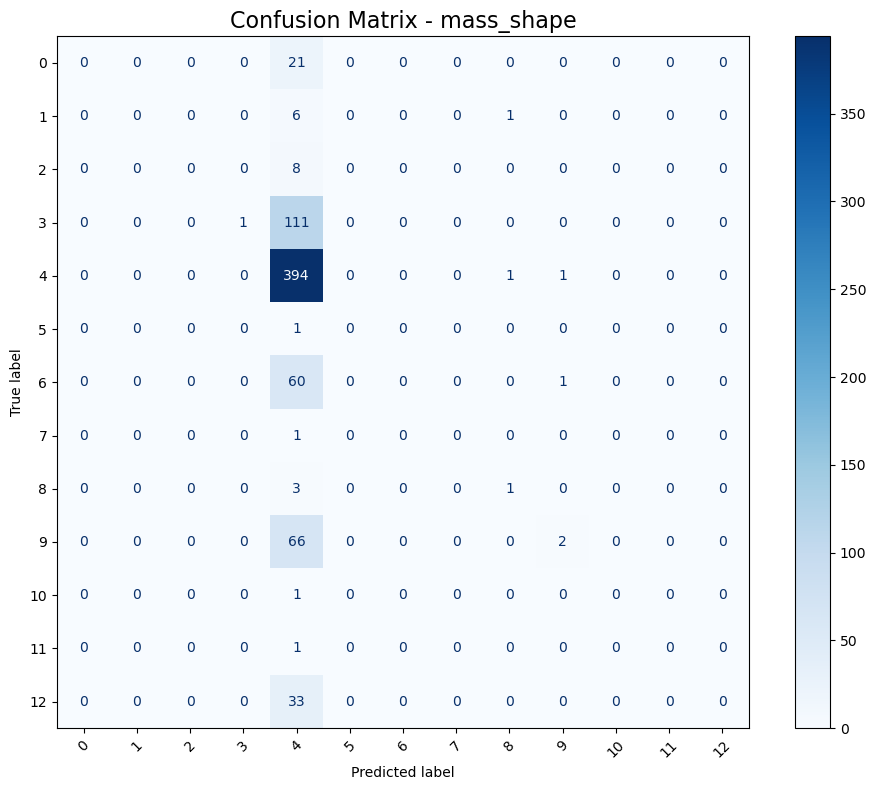

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedM

Classification Report for mass_shape:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         8
           3       1.00      0.01      0.02       112
           4       0.56      0.99      0.72       396
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        61
           9       0.00      0.00      0.00         1
          12       0.33      0.25      0.29         4
          13       0.50      0.03      0.06        68
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00        33

    accuracy                           0.56       714
   macro avg       0.18      0.10      0.08       714
weighted avg       0.52      0.56      0.41       714



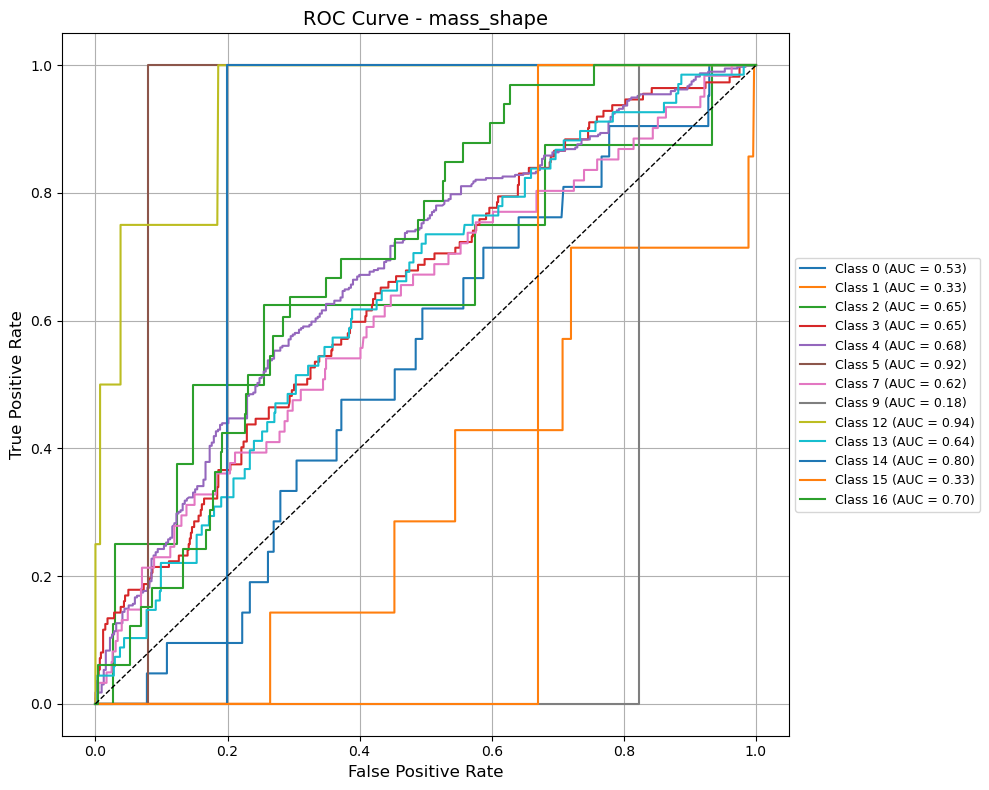


===== MASS_MARGINS =====



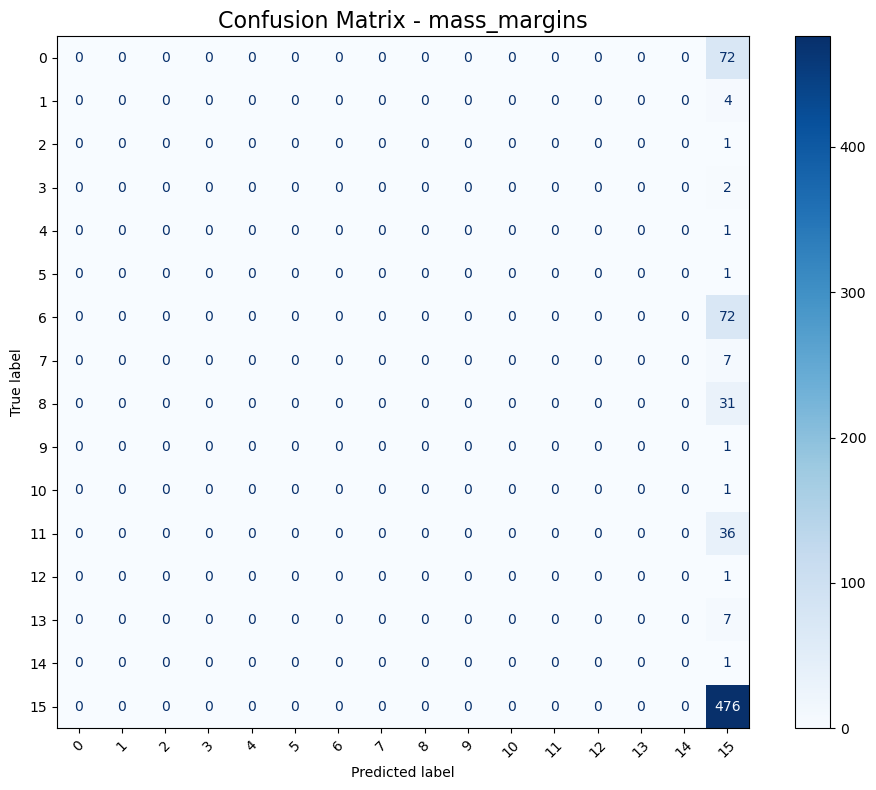

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedM

Classification Report for mass_margins:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        72
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00        31
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        36
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         7
          17       0.00      0.00      0.00         1
          18       0.67      1.00      0.80       476

    accuracy                           

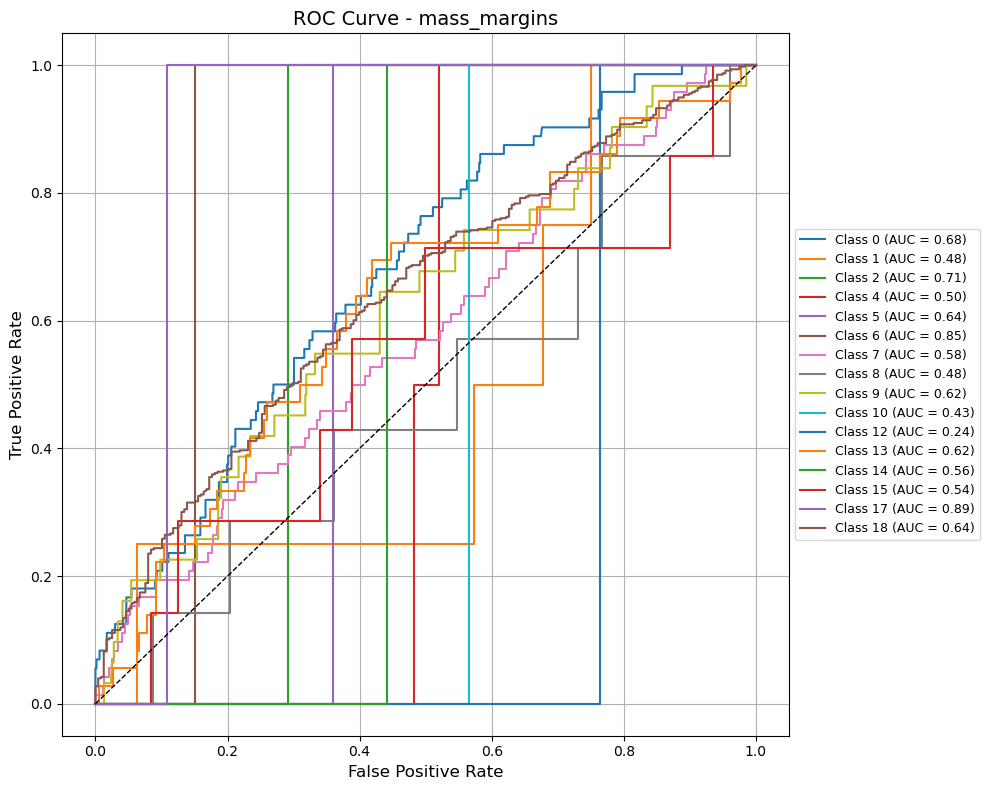


===== CALC_TYPE =====



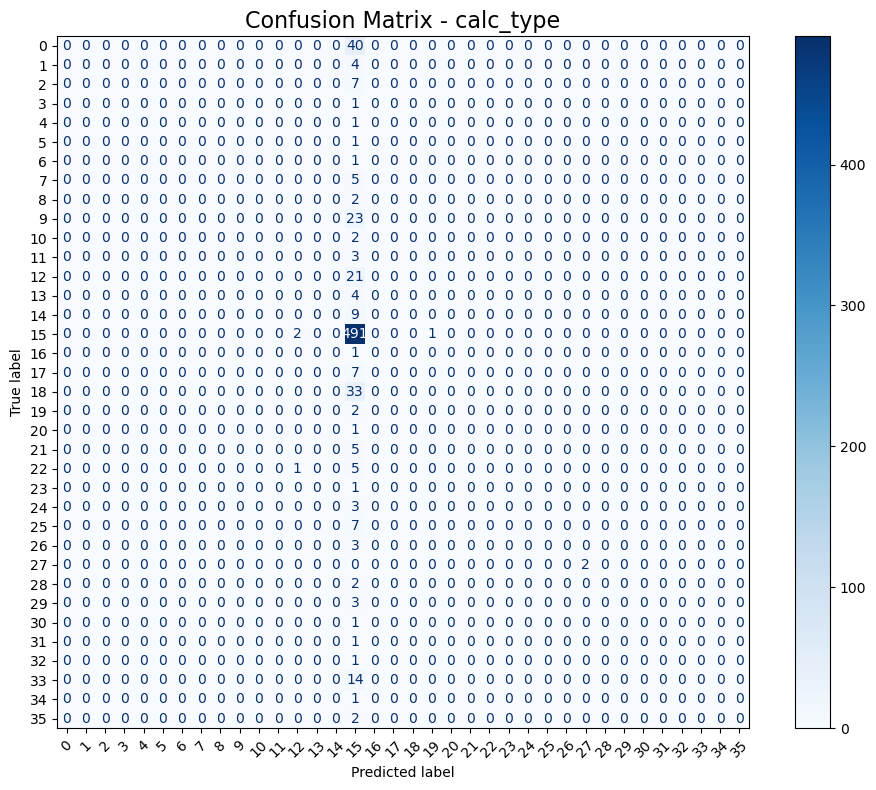

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedM

Classification Report for calc_type:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        23
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00        21
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         9
          18       0.69      0.99      0.82       494
          19       0.00      0.00      0.00

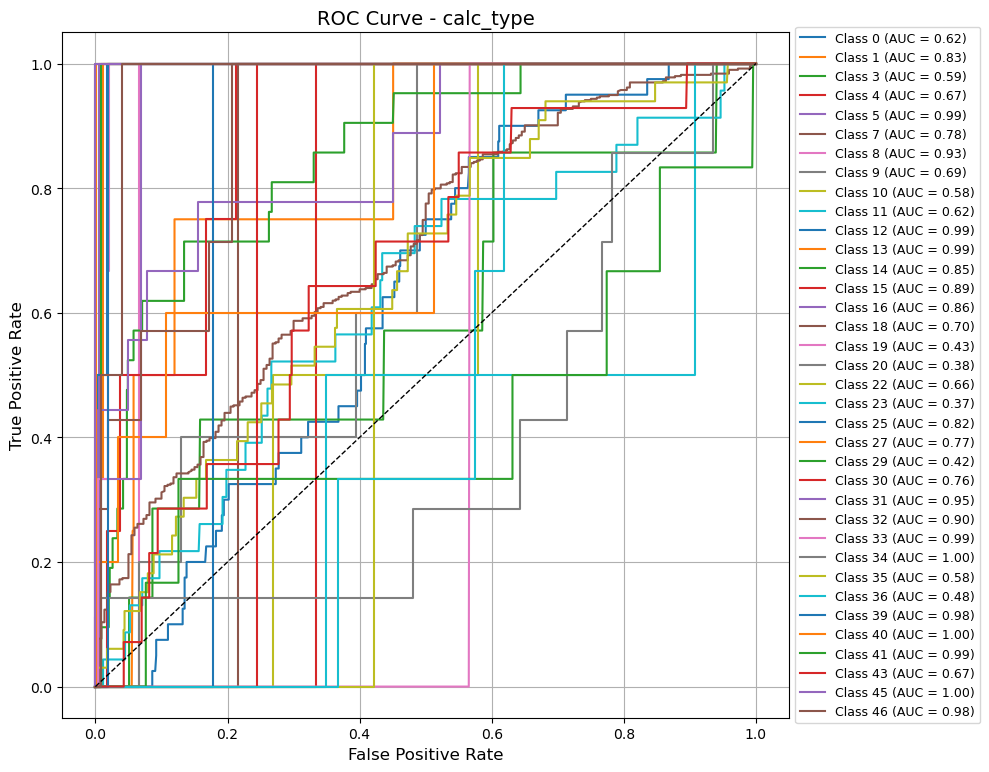


===== CALC_DISTRIBUTION =====



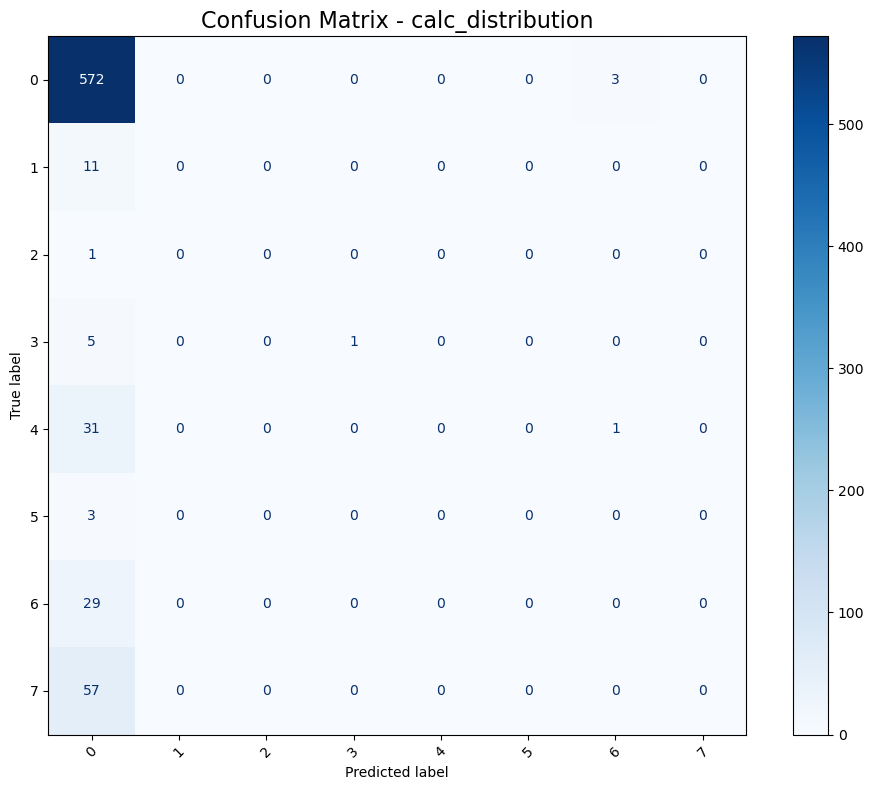

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



Classification Report for calc_distribution:

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       575
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        29
           8       0.00      0.00      0.00        57

    accuracy                           0.80       714
   macro avg       0.23      0.15      0.15       714
weighted avg       0.66      0.80      0.72       714



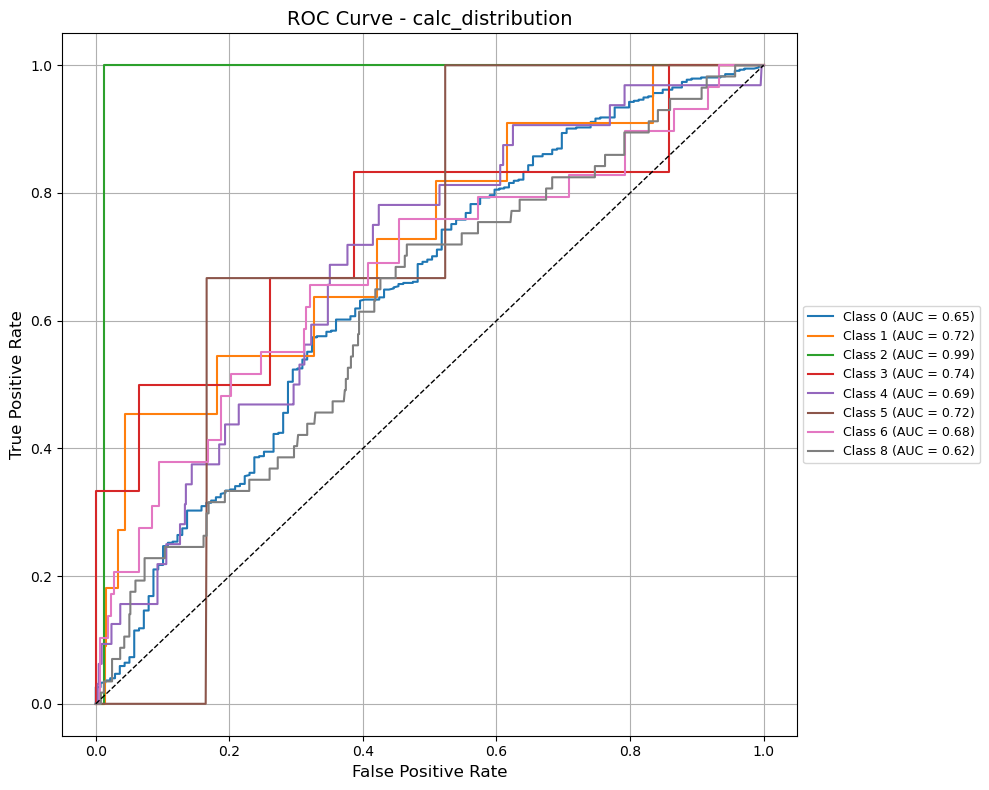


===== PATHOLOGY =====



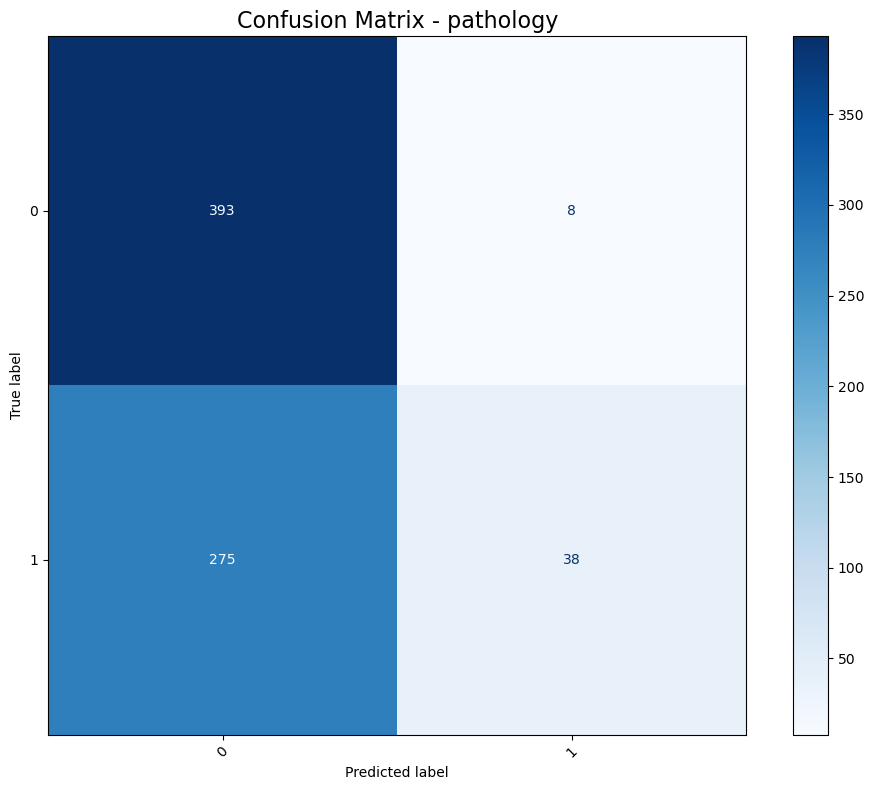

Classification Report for pathology:

              precision    recall  f1-score   support

           0       0.59      0.98      0.74       401
           1       0.83      0.12      0.21       313

    accuracy                           0.60       714
   macro avg       0.71      0.55      0.47       714
weighted avg       0.69      0.60      0.51       714



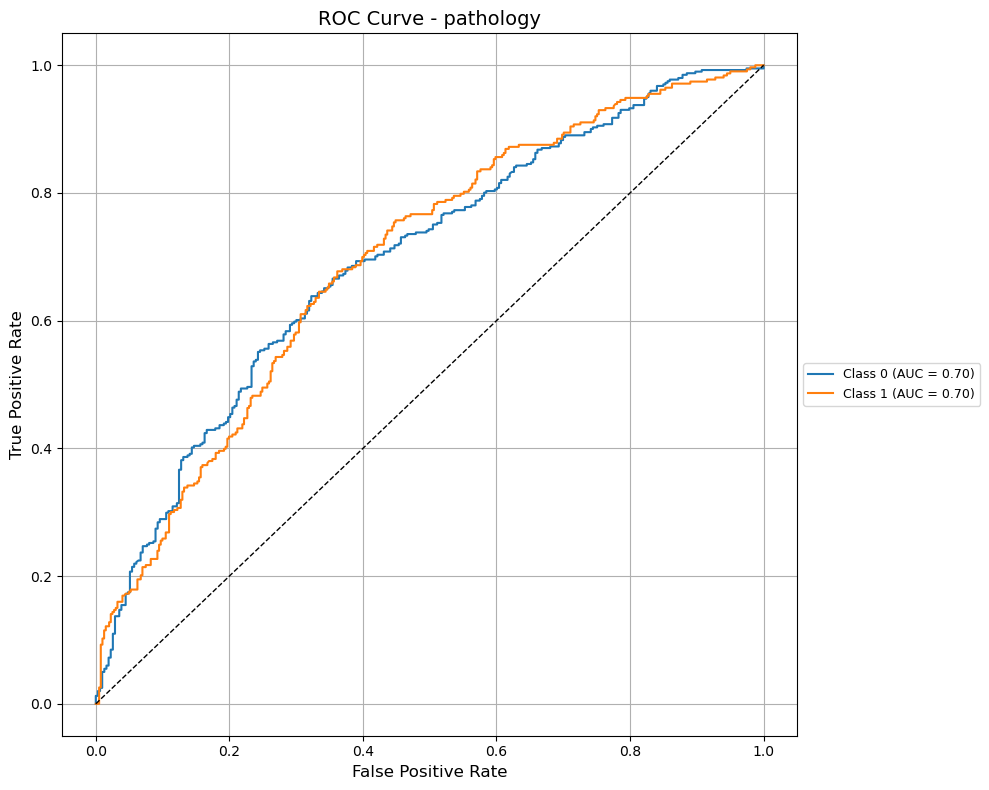


===== BREAST_DENSITY =====



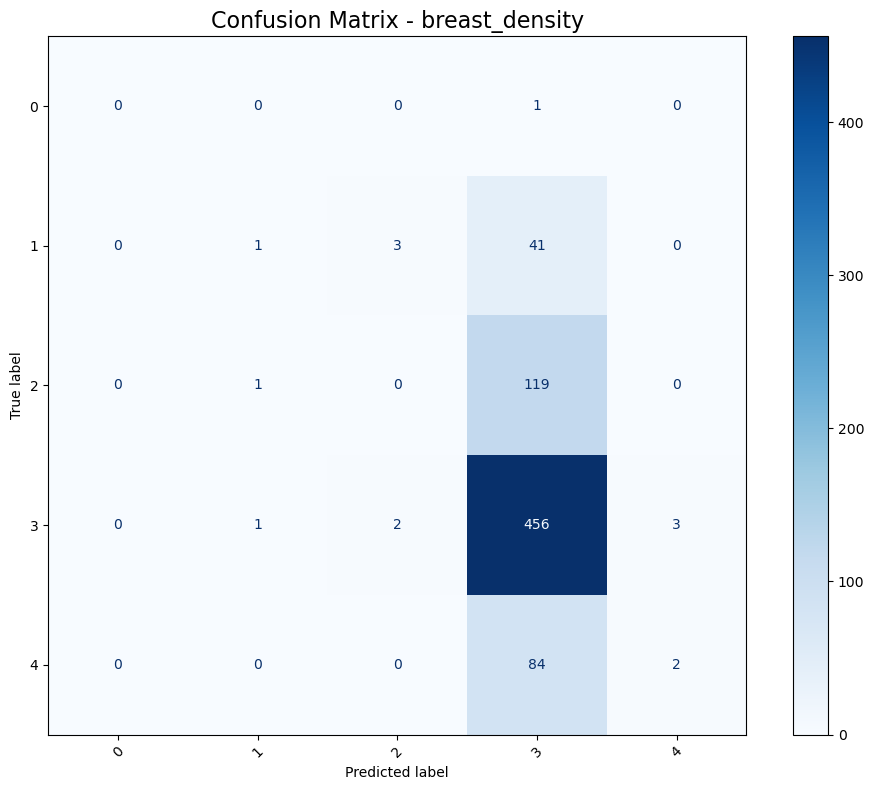

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report for breast_density:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      0.02      0.04        45
           2       0.00      0.00      0.00       120
           3       0.65      0.99      0.78       462
           4       0.40      0.02      0.04        86

    accuracy                           0.64       714
   macro avg       0.28      0.21      0.17       714
weighted avg       0.49      0.64      0.52       714



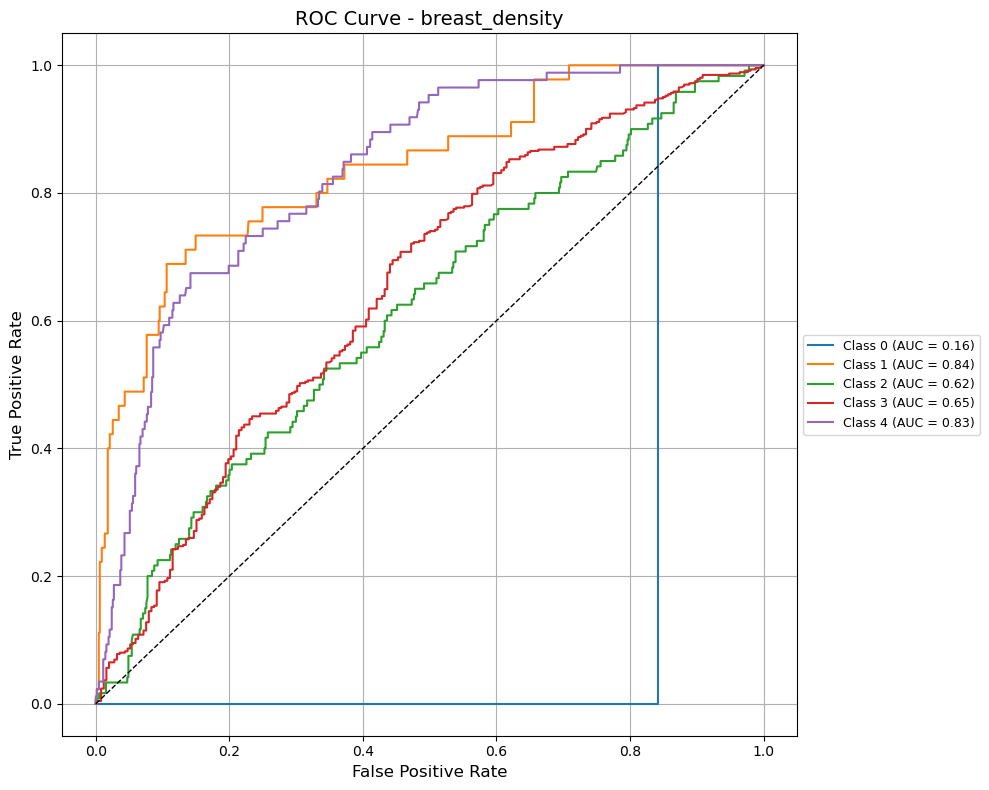


===== LEFT_OR_RIGHT_BREAST =====



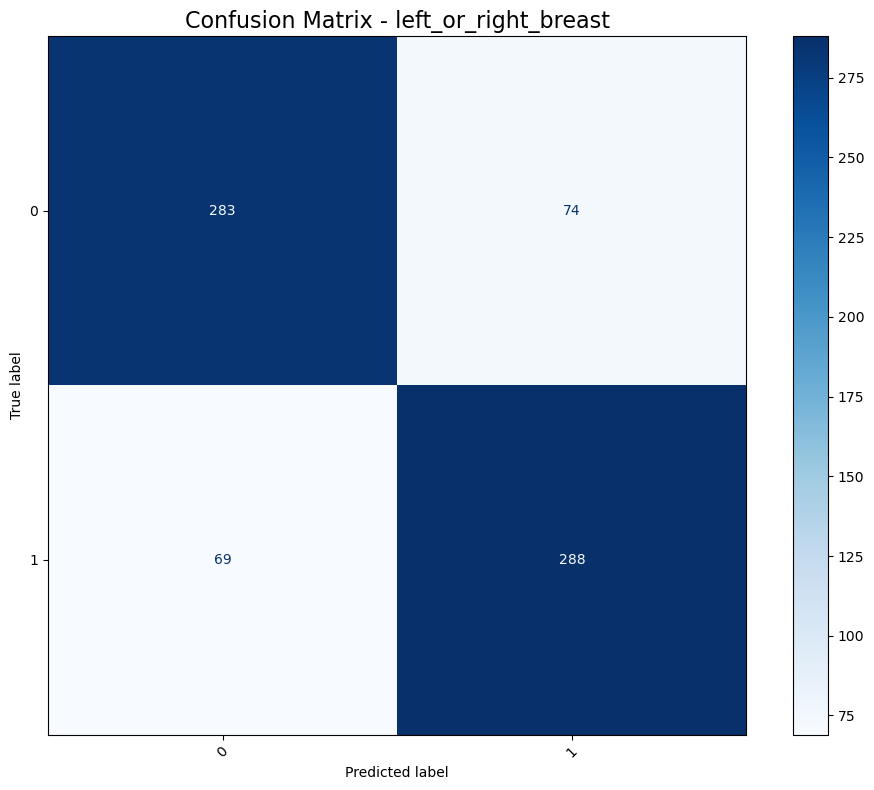

Classification Report for left_or_right_breast:

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       357
           1       0.80      0.81      0.80       357

    accuracy                           0.80       714
   macro avg       0.80      0.80      0.80       714
weighted avg       0.80      0.80      0.80       714



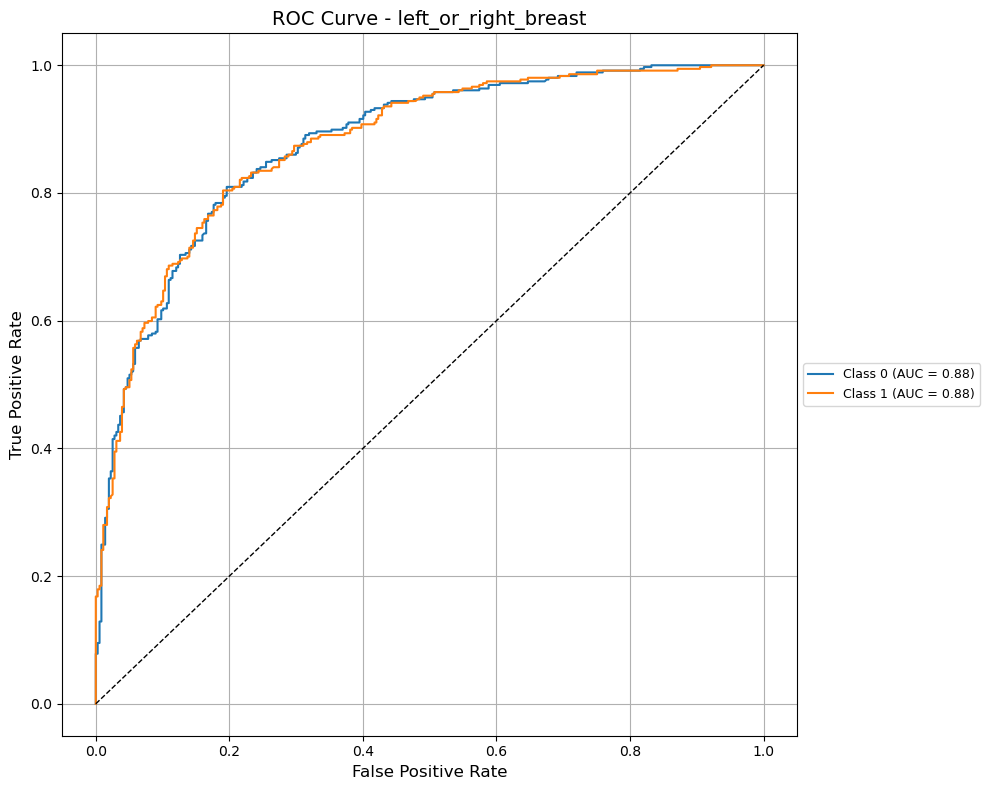


===== IMAGE_VIEW =====



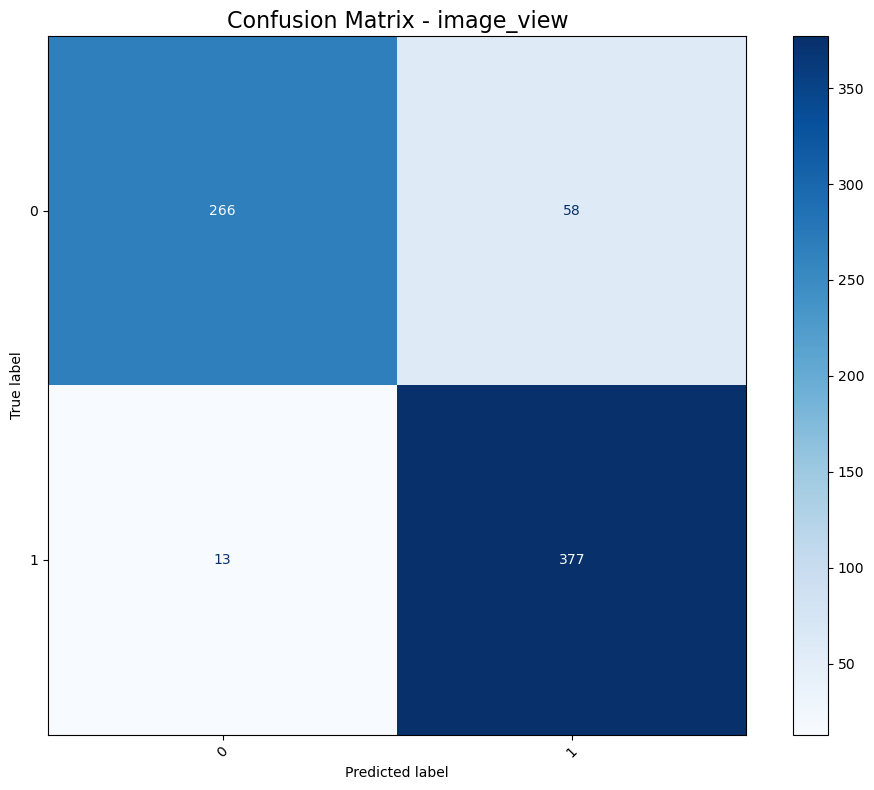

Classification Report for image_view:

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       324
           1       0.87      0.97      0.91       390

    accuracy                           0.90       714
   macro avg       0.91      0.89      0.90       714
weighted avg       0.91      0.90      0.90       714



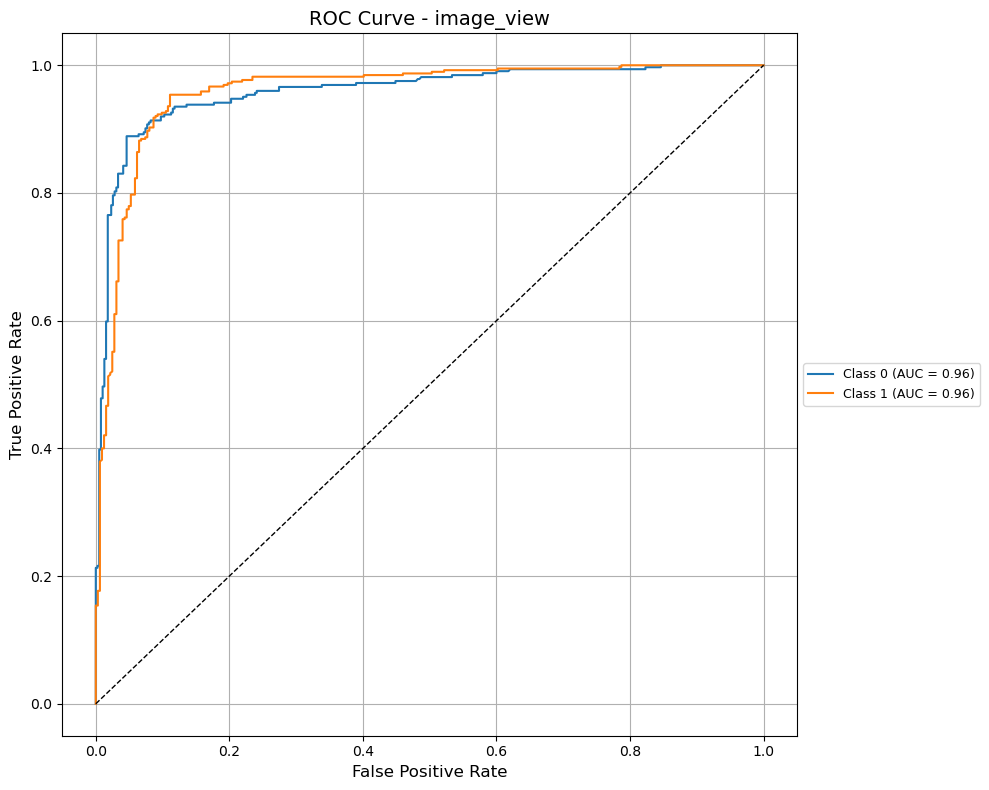


===== ABNORMALITY_ID =====



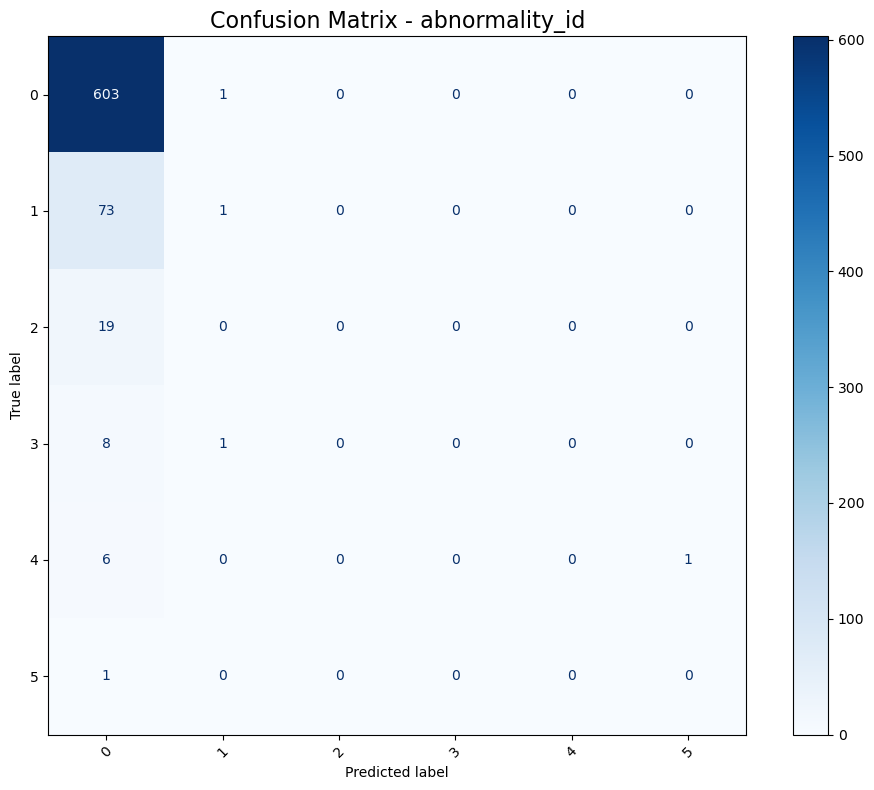

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\ABA\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



Classification Report for abnormality_id:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       604
           1       0.33      0.01      0.03        74
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1

    accuracy                           0.85       714
   macro avg       0.20      0.17      0.16       714
weighted avg       0.75      0.85      0.78       714



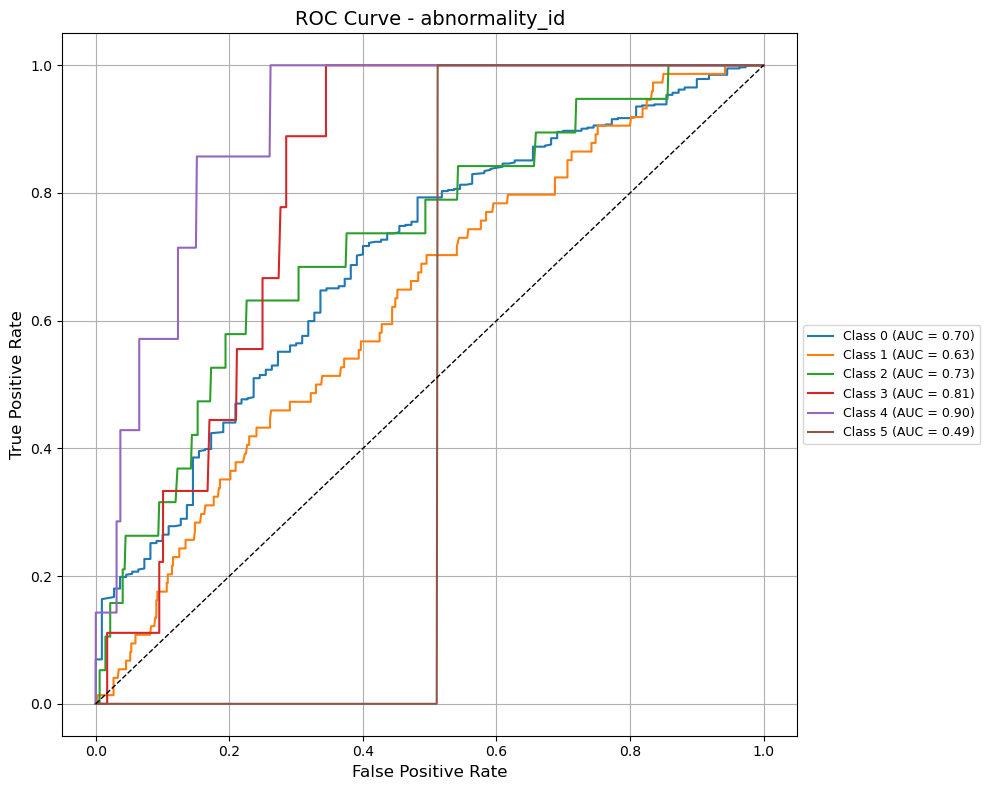


===== ABNORMALITY_TYPE =====



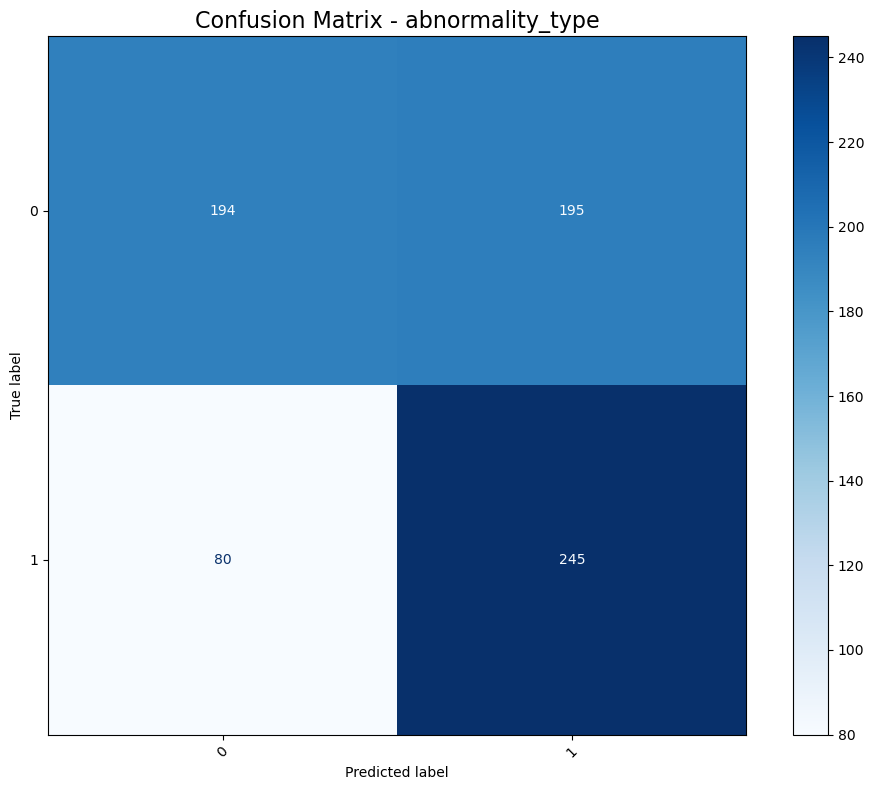

Classification Report for abnormality_type:

              precision    recall  f1-score   support

           0       0.71      0.50      0.59       389
           1       0.56      0.75      0.64       325

    accuracy                           0.61       714
   macro avg       0.63      0.63      0.61       714
weighted avg       0.64      0.61      0.61       714



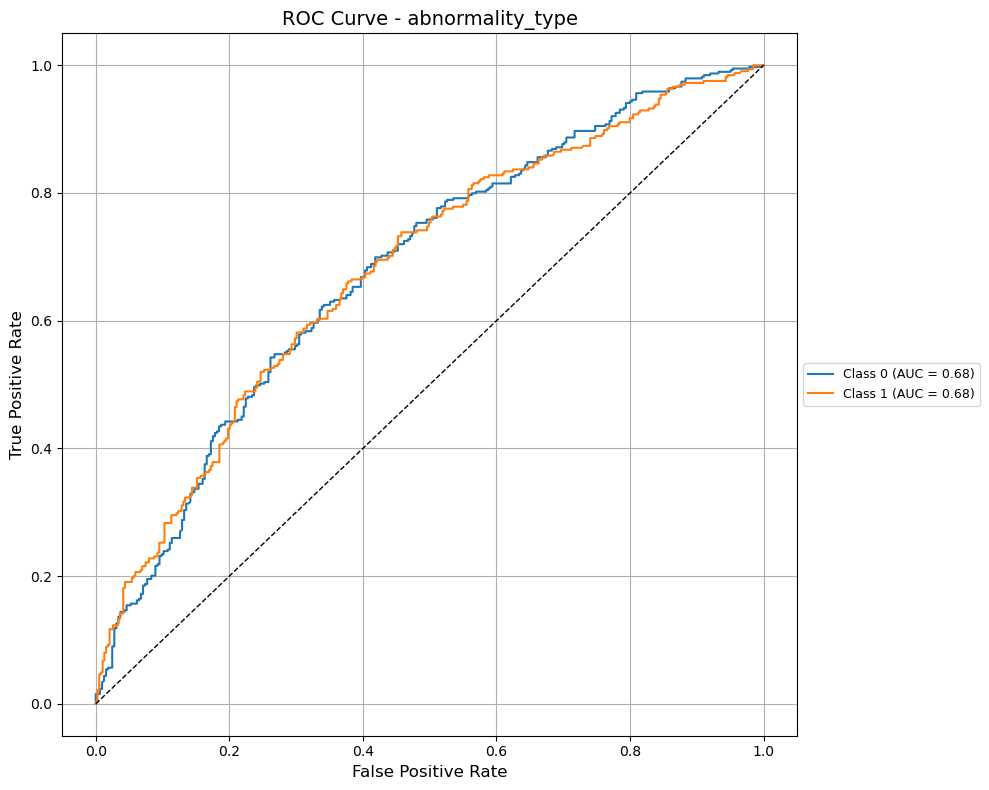

In [229]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

for i, name in enumerate(output_names):
    print(f"\n===== {name.upper()} =====\n")
    
    y_true_classes = np.argmax(true_labels[i], axis=1)
    y_pred_classes = np.argmax(predictions[i], axis=1)
    
    # ==== Confusion Matrix ====
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=ax, values_format='d')
    plt.title(f"Confusion Matrix - {name}", fontsize=16)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()
    
    # ==== Classification Report ====
    report = classification_report(y_true_classes, y_pred_classes)
    print(f"Classification Report for {name}:\n")
    print(report)
    
    # ==== ROC Curve ====
    n_classes = true_labels[i].shape[1]
    fpr, tpr, roc_auc = dict(), dict(), dict()
    
    plt.figure(figsize=(10, 8))
    for j in range(n_classes):
        try:
            fpr[j], tpr[j], _ = roc_curve(true_labels[i][:, j], predictions[i][:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])
            if not np.isnan(roc_auc[j]):
                plt.plot(fpr[j], tpr[j], lw=1.5, label=f'Class {j} (AUC = {roc_auc[j]:.2f})')
        except:
            continue

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve - {name}', fontsize=14)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [231]:
def image_processor_external(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image = image / 255.0
    return np.expand_dims(image, axis=0)

external_image_path = "E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.100131208110604806117271735422083351547/1-126.jpg"
external_image = image_processor_external(external_image_path, target_size)

predictions = train_model.predict(external_image)

for i, pred in enumerate(predictions):
    class_index = np.argmax(pred)
    print(f"Output {i}: Class {class_index} with probability {pred[0][class_index]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Output 0: Class 4 with probability 0.67
Output 1: Class 18 with probability 0.74
Output 2: Class 18 with probability 0.72
Output 3: Class 0 with probability 0.83
Output 4: Class 0 with probability 0.55
Output 5: Class 3 with probability 0.64
Output 6: Class 0 with probability 0.60
Output 7: Class 0 with probability 0.55
Output 8: Class 0 with probability 0.90
Output 9: Class 0 with probability 0.64


In [233]:
def image_processor_external(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image = image / 255.0
    return np.expand_dims(image, axis=0)

In [235]:
mass_shape_labels = list(pd.get_dummies(full_dataset['mass shape']).columns)
mass_margins_labels = list(pd.get_dummies(full_dataset['mass margins']).columns)
calc_type_labels = list(pd.get_dummies(full_dataset['calc type']).columns)
calc_distribution_labels = list(pd.get_dummies(full_dataset['calc distribution']).columns)
pathology_labels = list(pd.get_dummies(full_dataset['pathology']).columns)
breast_density_labels = list(pd.get_dummies(full_dataset['breast density']).columns)
left_or_right_breast_labels = list(pd.get_dummies(full_dataset['left or right breast']).columns)
image_view_labels = list(pd.get_dummies(full_dataset['image view']).columns)
abnormality_id_labels = list(pd.get_dummies(full_dataset['abnormality id']).columns)
abnormality_type_labels = list(pd.get_dummies(full_dataset['abnormality type']).columns)

label_lists = [
    mass_shape_labels, mass_margins_labels, calc_type_labels, calc_distribution_labels,
    pathology_labels, breast_density_labels, left_or_right_breast_labels, image_view_labels,
    abnormality_id_labels, abnormality_type_labels
]

output_names = [
    'mass_shape', 'mass_margins', 'calc_type', 'calc_distribution',
    'pathology', 'breast_density', 'left_or_right_breast', 'image_view',
    'abnormality_id', 'abnormality_type'
]


In [237]:
external_image_path = "E:/me/my Projects/dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.100131208110604806117271735422083351547/1-126.jpg"
external_image = image_processor_external(external_image_path, target_size)
predictions = train_model.predict(external_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


In [241]:
for i, pred in enumerate(predictions):
    class_index = np.argmax(pred)
    class_label = label_lists[i][class_index]
    probability = pred[0][class_index]
    
    print(f"Output {output_names[i]}: Predicted '{class_label}' with probability {probability:.2f}")


Output mass_shape: Predicted 'IRREGULAR-ARCHITECTURAL_DISTORTION' with probability 0.67
Output mass_margins: Predicted 'SPICULATED' with probability 0.74
Output calc_type: Predicted 'PLEOMORPHIC' with probability 0.72
Output calc_distribution: Predicted 'CLUSTERED' with probability 0.83
Output pathology: Predicted 'BENIGN' with probability 0.55
Output breast_density: Predicted '3.0' with probability 0.64
Output left_or_right_breast: Predicted 'LEFT' with probability 0.60
Output image_view: Predicted 'CC' with probability 0.55
Output abnormality_id: Predicted '1' with probability 0.90
Output abnormality_type: Predicted 'calcification' with probability 0.64


In [243]:
train_model.save("detailed_ex.h5")